In [53]:
import numpy as np
import json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

with open('mnist.json', 'r') as filey:
    data =json.loads(filey.read())
print(len(data))

527


In [54]:
# Prepare data into lists
io_read_count = []
io_write_count = []
io_read_bytes = []
io_write_bytes = []

for item in data:
    io_read_count.append(item["io_counters"]["read_count"])
    io_write_count.append(item["io_counters"]["write_count"])
    io_read_bytes.append(item["io_counters"]["read_bytes"])
    io_write_bytes.append(item["io_counters"]["write_count"])

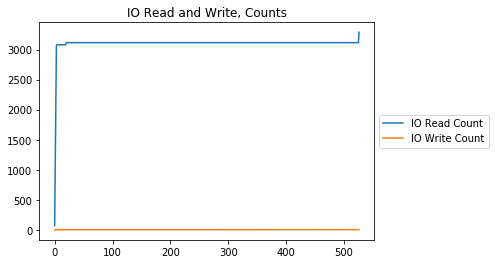

In [55]:
# Make plots for counts
plt.plot(io_read_count)
plt.plot(io_write_count)
plt.legend(["IO Read Count","IO Write Count"], loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("IO Read and Write, Counts")
plt.show()

In [56]:
data[0].keys()

dict_keys(['ppid', 'memory_percent', 'cpu_num', 'name', 'exe', 'connections', 'uids', 'num_threads', 'create_time', 'terminal', 'cpu_times', 'cwd', 'gids', 'num_fds', 'status', 'open_files', 'cmdline', 'cpu_percent', 'ionice', 'io_counters', 'pid', 'username', 'cpu_affinity', 'nice', 'memory_full_info', 'num_ctx_switches', 'SECONDS'])

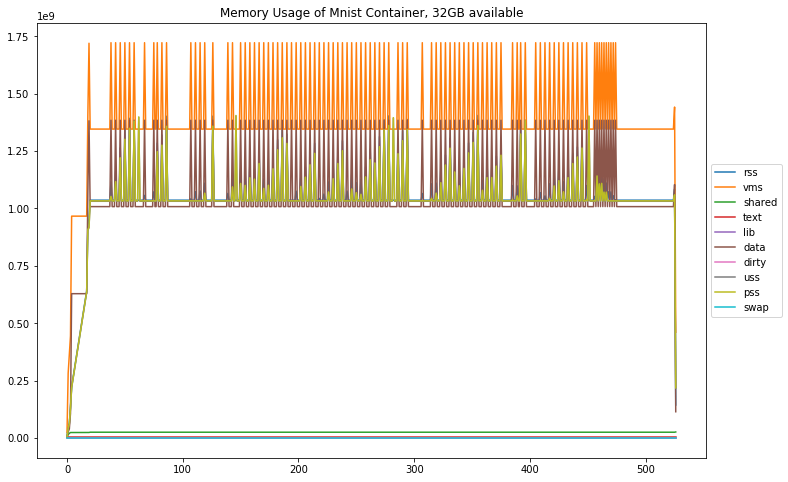

In [65]:
rss = [x['memory_full_info']['rss'] for x in data]
vms = [x['memory_full_info']['vms'] for x in data]
shared = [x['memory_full_info']['shared'] for x in data]
text = [x['memory_full_info']['text'] for x in data]
lib = [x['memory_full_info']['lib'] for x in data]
dat = [x['memory_full_info']['data'] for x in data]
dirty = [x['memory_full_info']['dirty'] for x in data]
uss = [x['memory_full_info']['uss'] for x in data]
pss = [x['memory_full_info']['pss'] for x in data]
swap = [x['memory_full_info']['swap'] for x in data]

labels = ["rss", "vms", "shared", "text", "lib", "data", "dirty","uss","pss", "swap"]
memory = [rss, vms, shared, text, lib, dat, dirty, uss, pss, swap]
plt.figure(figsize=(12,8))
for entry in memory:
    plt.plot(entry)
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Memory Usage of Mnist Container, 32GB available")
plt.show()

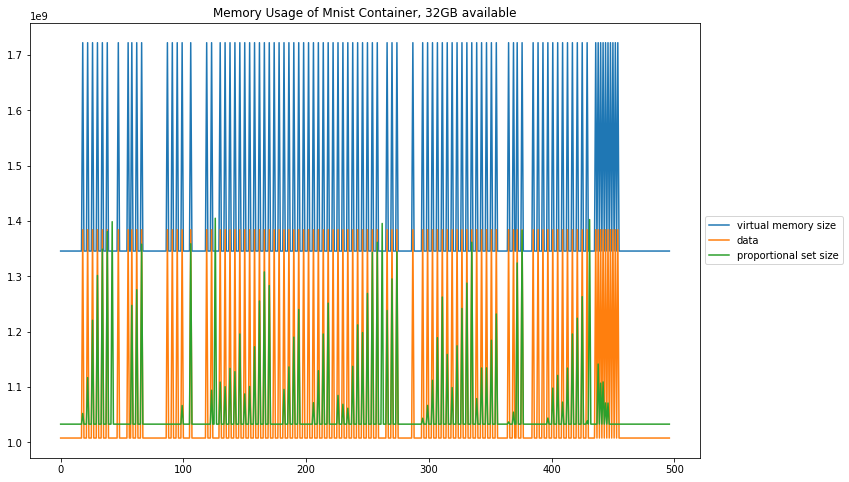

In [86]:
# Let's zoom in
memory = [vms, dat, pss]
labels = ["virtual memory size", "data", "proportional set size"]
plt.figure(figsize=(12,8))
for entry in memory:
    plt.plot(entry[20:-10])
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Memory Usage of Mnist Container, 32GB available")
plt.show()